# **Project Title: E-commerce Product Review Sentiment Analysis**

Analyze customer sentiments from product reviews to determine whether they're positive, neutral, or negative using TextBlob. I'll also visualize the results using a pie chart and word clouds.

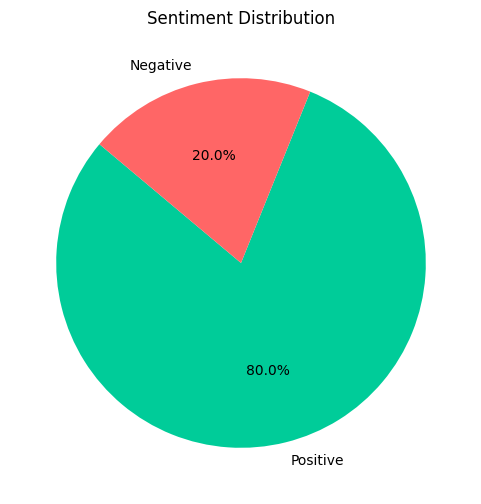

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


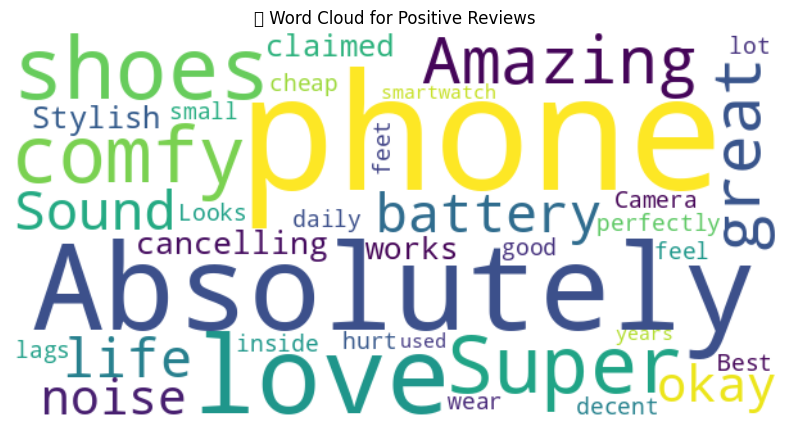

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128162 (\N{ANGER SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


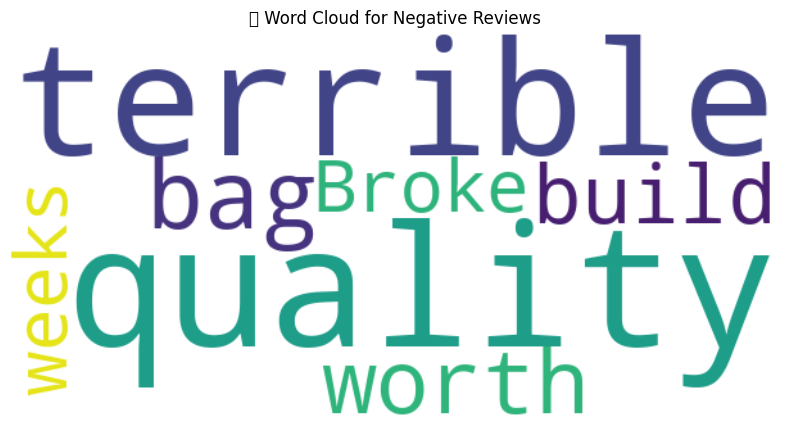

✅ CSV exported: ecommerce_reviews_with_sentiment.csv


,Product,Review,Sentiment
0,Shoes,Absolutely love these shoes! Super comfy.,Positive
1,Bag,"The bag quality is terrible, not worth it.",Negative
2,Phone,Amazing phone with great battery life.,Positive
3,Headphones,Sound is okay but not noise-cancelling as clai...,Positive
4,Watch,Stylish and works perfectly. I wear it daily.,Positive
5,Shoes,They hurt my feet and feel cheap.,Positive
6,Phone,Camera is decent but phone lags a lot.,Positive
7,Bag,Looks good but very small inside.,Positive
8,Watch,Best smartwatch I've used in years!,Positive
9,Headphones,Terrible build quality. Broke in 2 weeks.,Negative


In [1]:
# 📌 Step 1: Install Libraries (Google Colab only)
!pip install textblob wordcloud

# 📌 Step 2: Import Libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 📌 Step 3: Create a Sample E-commerce Review Dataset
data = {
    'Product': ['Shoes', 'Bag', 'Phone', 'Headphones', 'Watch', 'Shoes', 'Phone', 'Bag', 'Watch', 'Headphones'],
    'Review': [
        "Absolutely love these shoes! Super comfy.",
        "The bag quality is terrible, not worth it.",
        "Amazing phone with great battery life.",
        "Sound is okay but not noise-cancelling as claimed.",
        "Stylish and works perfectly. I wear it daily.",
        "They hurt my feet and feel cheap.",
        "Camera is decent but phone lags a lot.",
        "Looks good but very small inside.",
        "Best smartwatch I've used in years!",
        "Terrible build quality. Broke in 2 weeks."
    ]
}

df = pd.DataFrame(data)
df.head()

# 📌 Step 4: Analyze Sentiment
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Review'].apply(get_sentiment)

# 📌 Step 5: Visualize Sentiment Distribution
sentiment_counts = df['Sentiment'].value_counts()

# Pie Chart
colors = ['#00cc99', '#ff6666', '#cccccc']
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Sentiment Distribution")
plt.show()

# 📌 Step 6: WordClouds
# Combine reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['Review'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['Review'])

# Generate word clouds
wc = WordCloud(width=600, height=300, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('🌟 Word Cloud for Positive Reviews')
plt.show()

wc = WordCloud(width=600, height=300, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('💢 Word Cloud for Negative Reviews')
plt.show()

# 📌 Step 7: Export Results (Optional)
df.to_csv("ecommerce_reviews_with_sentiment.csv", index=False)
print("✅ CSV exported: ecommerce_reviews_with_sentiment.csv")

# 📌 Step 8: Show Final Labeled Data
df


In [2]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00


In [3]:
import gradio as gr
from textblob import TextBlob

# Function to analyze sentiment
def analyze_review(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Sentiment: Positive 😊"
    elif polarity < 0:
        return "Sentiment: Negative 😠"
    else:
        return "Sentiment: Neutral 😐"

# Gradio UI
gr_interface = gr.Interface(
    fn=analyze_review,
    inputs=gr.Textbox(label="Enter a Product Review"),
    outputs=gr.Textbox(label="Sentiment Analysis Result"),
    title="E-commerce Review Sentiment Analyzer",
    description="Enter a product review and find out if it's Positive, Negative, or Neutral!",
)

# Launch the Gradio App
gr_interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ee2f0248ce8115f137.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
